# Sequence clustering

### Libraries

In [8]:
from collections import Counter
import numpy as np
import os
from Bio import SeqIO
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Step 1: Sequence Encoding

In [2]:
input_dir = "C:/Users/victo/Desktop/curro/mRNA-protein-analysis/data/processed/proteins"

Data loading

In [3]:
def read_protein_sequences(directory):
    sequences = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if filepath.endswith(".fasta"):
            for record in SeqIO.parse(filepath, "fasta"):
                sequences.append(str(record.seq))
    return sequences

In [4]:
protein_sequences = read_protein_sequences(input_dir)

Encode the sequences using Bag of Words

In [5]:
def bag_of_words_encode_sequence(seq, amino_acids="ACDEFGHIKLMNPQRSTVWY"):
    count = Counter(seq)
    return np.array([count[aa] for aa in amino_acids])

In [6]:
X = np.array([bag_of_words_encode_sequence(seq) for seq in protein_sequences])

### Step 2: Apply Clustering

Apply K-means clustering

In [9]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

Visualize clusters using PCA to reduce dimensionality to 2D

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

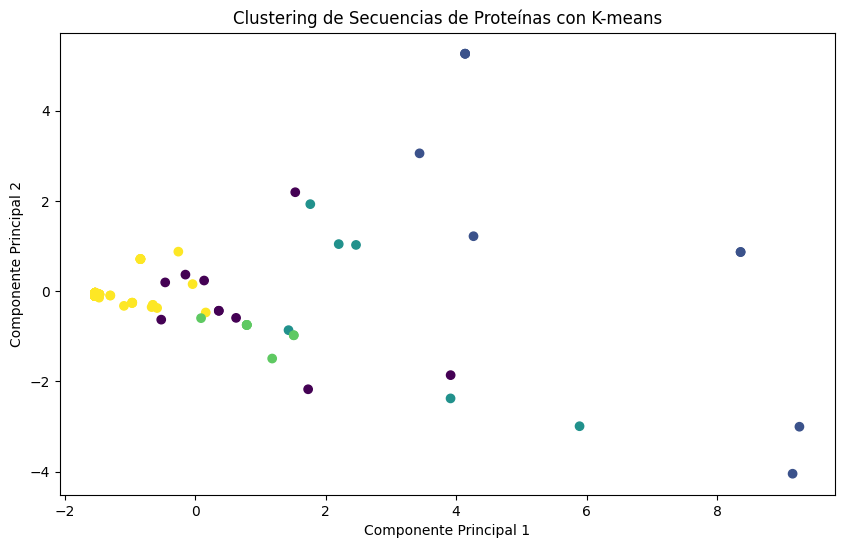

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering de Secuencias de Proteínas con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### Interpretation

**Differences in Function or Structure:**
The clusters identified in the graph may represent groups of protein sequences that have structural or functional similarities. Proteins within a cluster may be functionally related, have similar structures, or belong to the same protein family.

# What about a Latent Representation with Autoencoders?
Another interesting option is to use an autoencoder to learn a latent representation of the sequences.

We can use One-Hot Encoding to encode each stream and then feed that encoding to an autoencoder. We first need all streams to be the same length, so we'll pad them if necessary.

We will train an autoencoder to learn a compact (latent) representation of the sequences.

**What you can get:**

1. *Latent representation:* Using the encoder, you can get a more compact representation of the sequences that captures their main features.

This latent representation can be used for clustering, visualization, or even for transfer learning in another classification model (if you get labels in the future).